**Classification binaire : regression logistique**

**A partir des resultats des probabilités, comment on sait si c'est 0 ou 1. On generale, on fixe un seuil**

**4 principales approches pour determiner le seuil adapté à notre problématique ( le euil optimal)**

### 1. Importation des packages

In [2]:
# Importation des modules necessaires
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### 2. Chargement des données

In [5]:
bankdata=pd.read_csv("C:\\Users\\brech\\MonFichierDeTravail\\ML\\bank_cleaned.csv",sep=",",index_col=0)
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [7]:
# Renommer les colonnes
bankdata.rename(columns={
    'age': 'age',
    'job': 'profession',
    'marital': 'situation_familiale',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'balance': 'solde_bancaire',
    'housing': 'pret_immobilier',
    'loan': 'pret_personnel',
    'day': 'jour_du_mois',
    'month': 'mois',
    'duration': 'duree_appel',
    'campaign': 'nb_appels',
    'pdays': 'nb_jours_depuis_dernier_appel',
    'previous': 'nb_appels_precedents',
    'poutcome': 'resultat_campagne_precedente',
    'response': 'reponse_campagne_actuelle',
    'response_binary': 'reponse_campagne_actuelle_binaire'
}, inplace=True)

# Afficher les noms de colonnes mis à jour
print(bankdata.columns)

Index(['age', 'profession', 'situation_familiale', 'niveau_etudes',
       'defaut_credit', 'solde_bancaire', 'pret_immobilier', 'pret_personnel',
       'jour_du_mois', 'mois', 'duree_appel', 'nb_appels',
       'nb_jours_depuis_dernier_appel', 'nb_appels_precedents',
       'resultat_campagne_precedente', 'reponse_campagne_actuelle',
       'reponse_campagne_actuelle_binaire'],
      dtype='object')


### 2.2 Qualité des données

In [10]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40841 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                40841 non-null  int64  
 1   profession                         40841 non-null  object 
 2   situation_familiale                40841 non-null  object 
 3   niveau_etudes                      40841 non-null  object 
 4   defaut_credit                      40841 non-null  object 
 5   solde_bancaire                     40841 non-null  int64  
 6   pret_immobilier                    40841 non-null  object 
 7   pret_personnel                     40841 non-null  object 
 8   jour_du_mois                       40841 non-null  int64  
 9   mois                               40841 non-null  object 
 10  duree_appel                        40841 non-null  float64
 11  nb_appels                          40841 non-null  int64  


In [12]:
bankdata.describe(include="all")

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle,reponse_campagne_actuelle_binaire
count,40841.000000,40841,40841,40841,40841,40841.000000,40841,40841,40841.000000,40841,40841.000000,40841.000000,40841.000000,40841.000000,40841,40841,40841.000000
unique,NaN,12,3,3,2,NaN,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,NaN,NaN,unknown,no,NaN
freq,NaN,8805,24641,21933,40078,NaN,22820,34042,NaN,12496,NaN,NaN,NaN,NaN,34802,36202,NaN
mean,40.790676,NaN,NaN,NaN,NaN,1073.981807,NaN,NaN,15.863666,NaN,4.308949,2.774149,32.248304,0.436791,NaN,NaN,0.113587
std,10.475473,NaN,NaN,NaN,NaN,1712.556186,NaN,NaN,8.313608,NaN,4.305823,3.104177,90.738402,1.572342,NaN,NaN,0.317313
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,1.000000,NaN,0.100000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,8.000000,NaN,1.730000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,421.000000,NaN,NaN,16.000000,NaN,3.000000,2.000000,-1.000000,0.000000,NaN,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1333.000000,NaN,NaN,21.000000,NaN,5.300000,3.000000,-1.000000,0.000000,NaN,NaN,0.000000


In [14]:
bankdata.isnull().sum()

age                                  0
profession                           0
situation_familiale                  0
niveau_etudes                        0
defaut_credit                        0
solde_bancaire                       0
pret_immobilier                      0
pret_personnel                       0
jour_du_mois                         0
mois                                 0
duree_appel                          0
nb_appels                            0
nb_jours_depuis_dernier_appel        0
nb_appels_precedents                 0
resultat_campagne_precedente         0
reponse_campagne_actuelle            0
reponse_campagne_actuelle_binaire    0
dtype: int64

### 3. Description de la base de données

In [17]:
# Créer une nouvelle version de la base de données sans variable "response"
bankdata_new = bankdata.drop(columns=['reponse_campagne_actuelle_binaire'])
bankdata_new.head()

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no


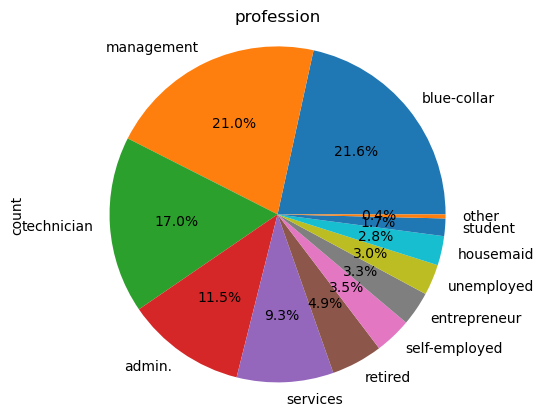

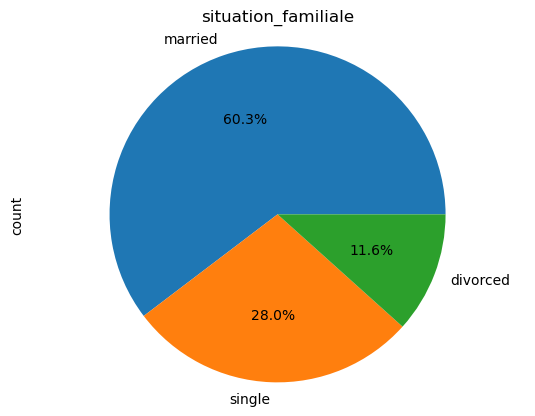

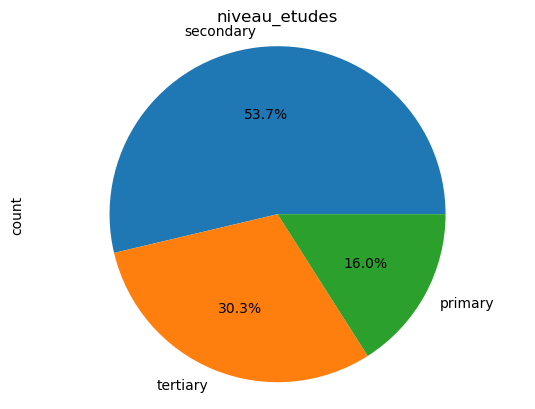

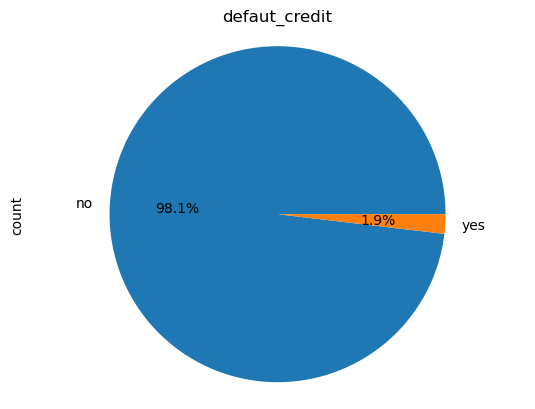

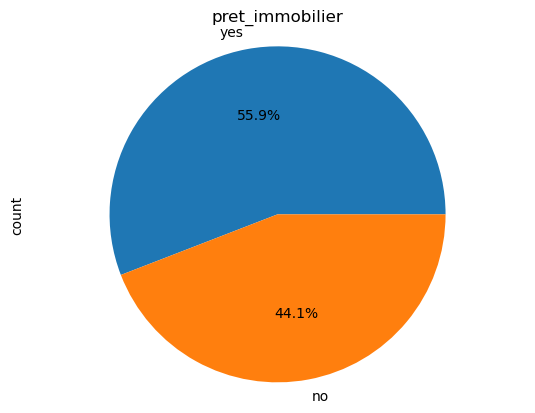

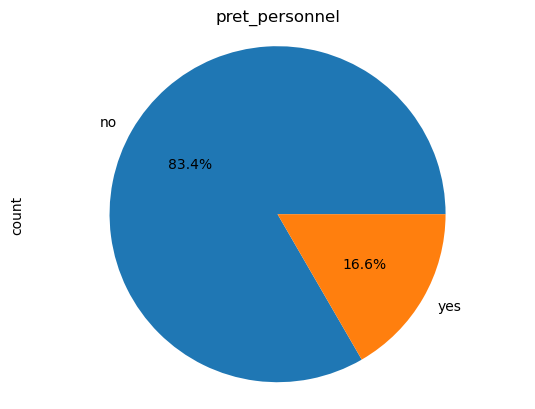

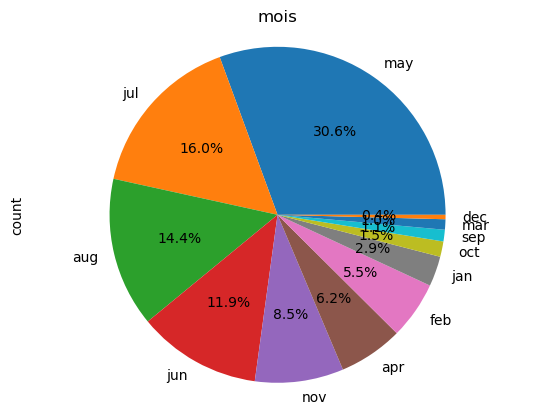

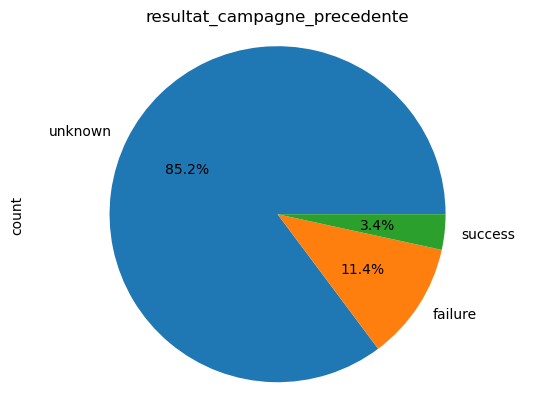

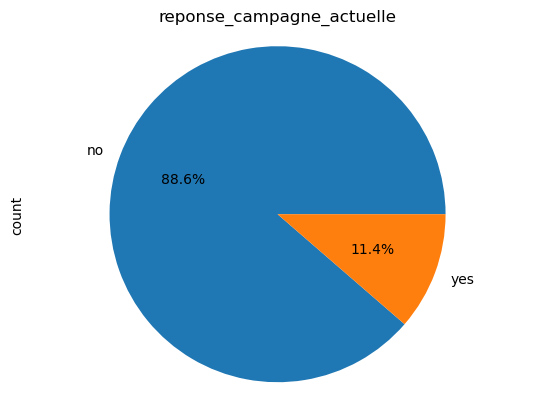

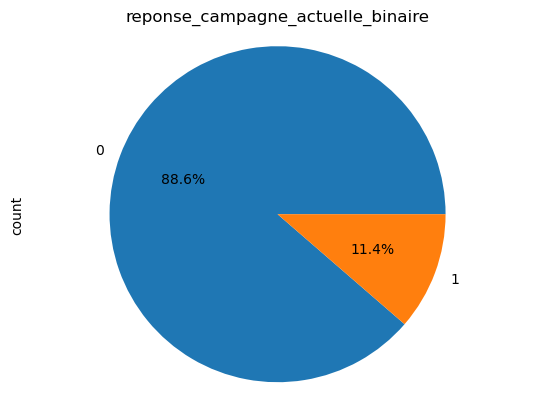

In [20]:
# Sectionner les variables qualitatives catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel',
             'mois', 'resultat_campagne_precedente', 'reponse_campagne_actuelle', 'reponse_campagne_actuelle_binaire']

# Generer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    bankdata[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

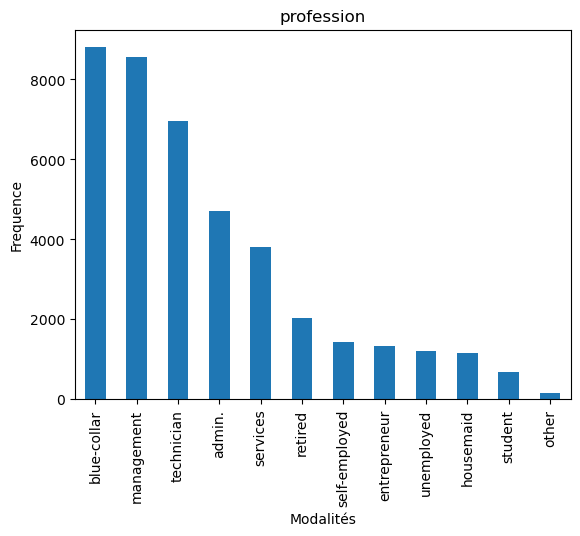

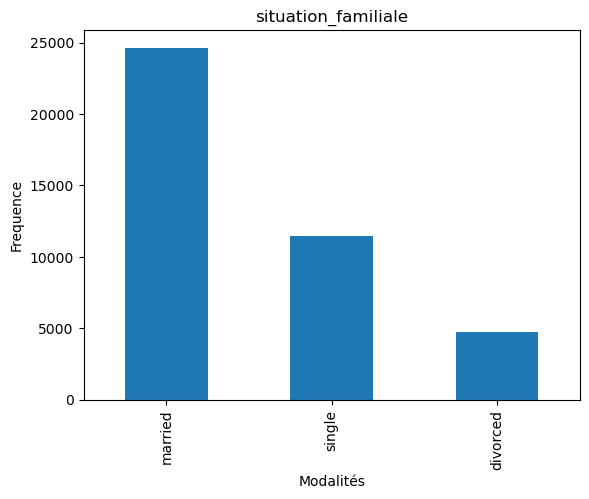

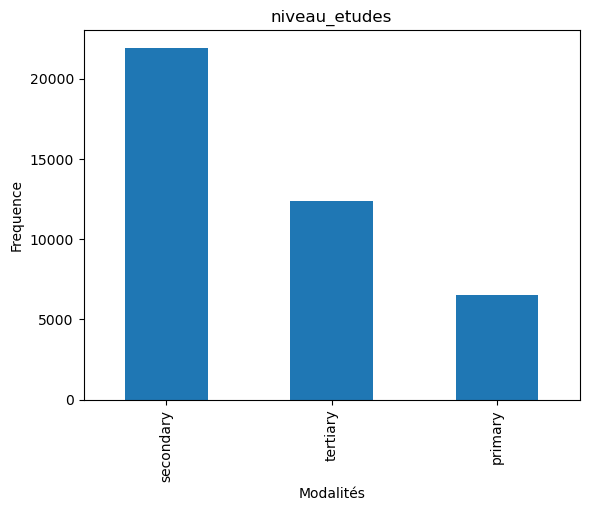

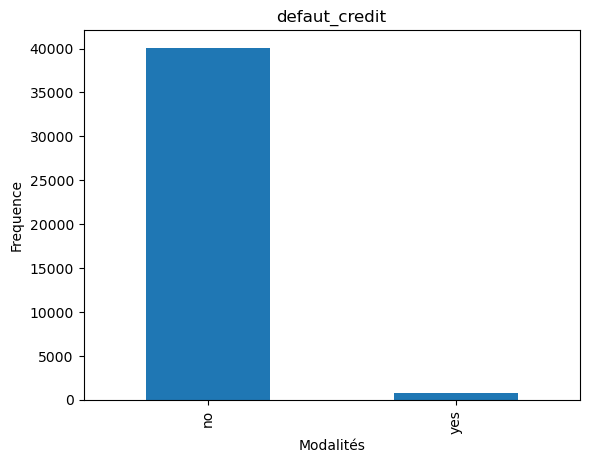

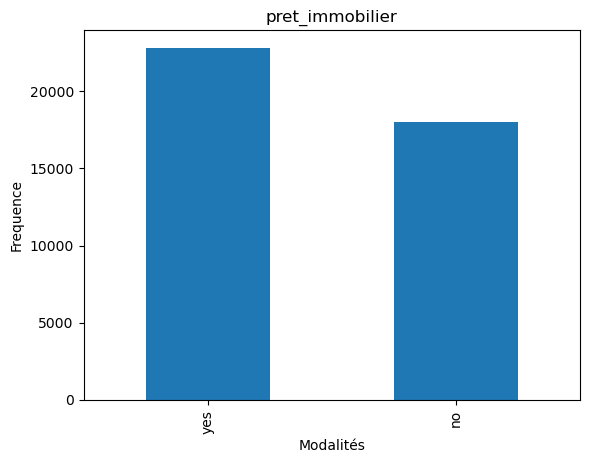

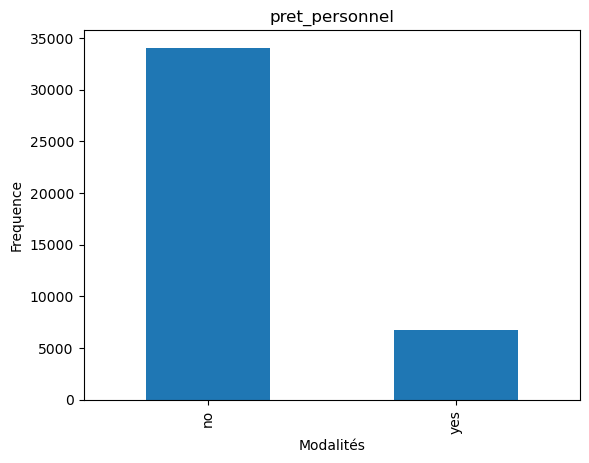

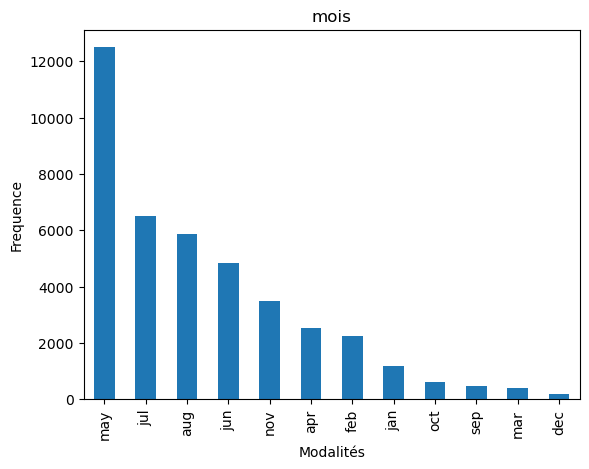

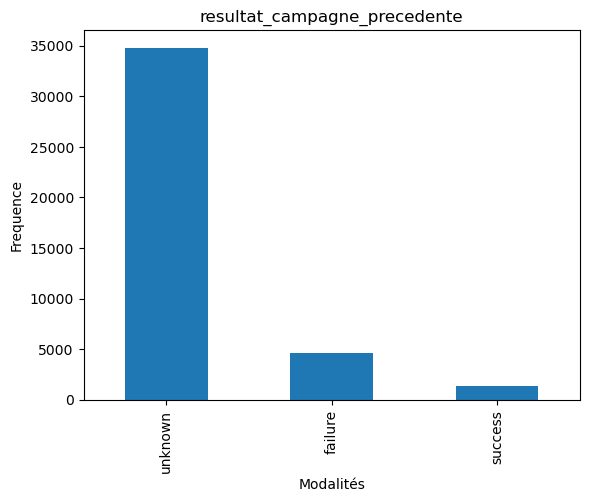

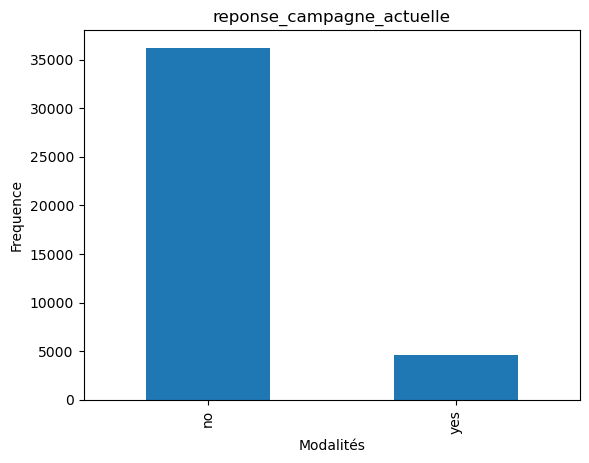

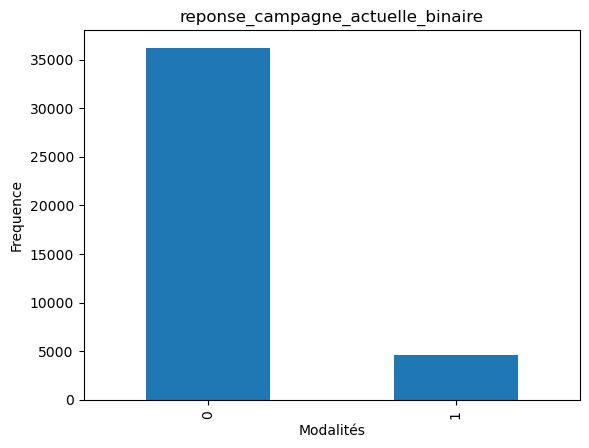

In [22]:
# Generer un barplot pour chaque variable categorielle
for var in cat_vars:
    bankdata[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Frequence')
    plt.show()

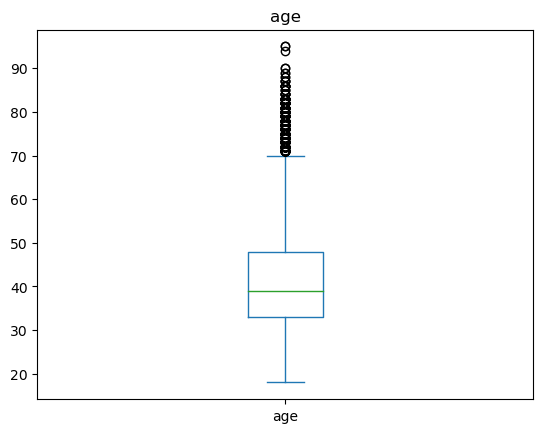

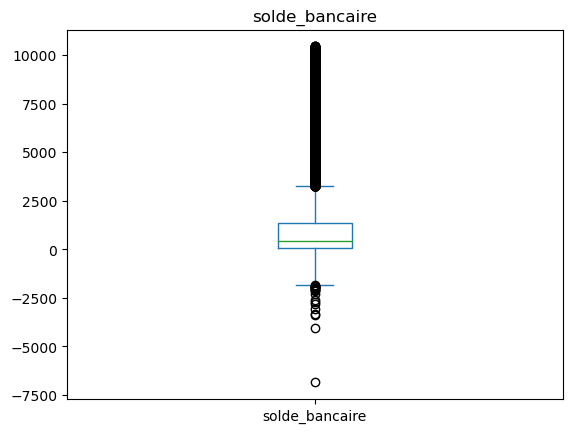

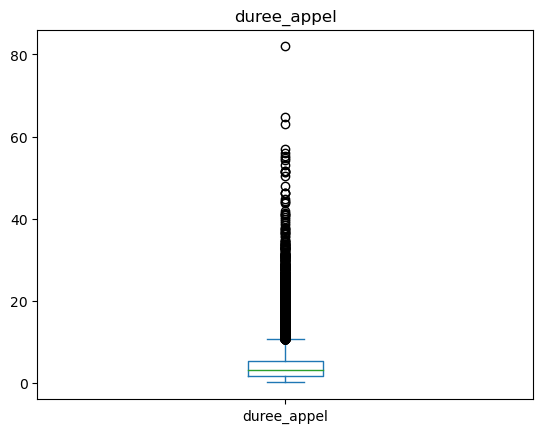

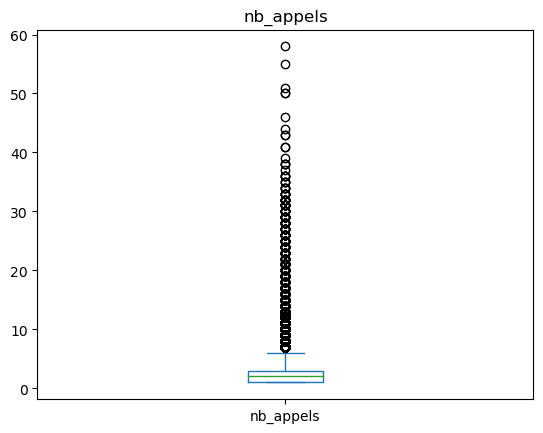

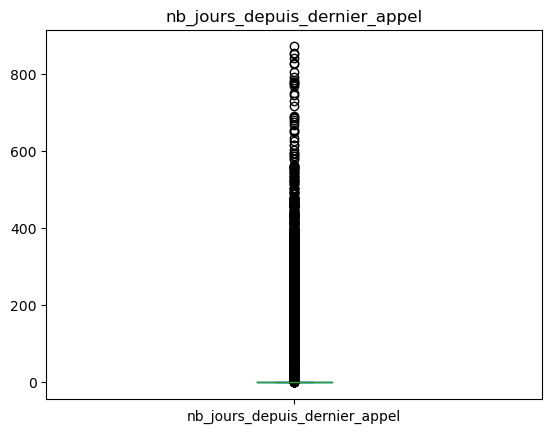

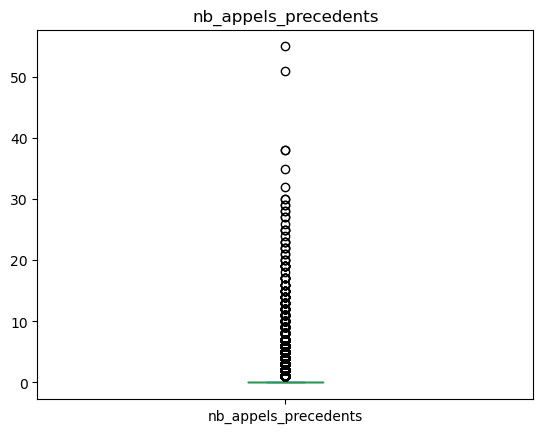

In [24]:
# Selectionner les variables numériques
num_vars = ['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']

# Generer un box plot pour chaque variable numérique
for var in num_vars:
    bankdata[var].plot(kind='box')
    plt.title(var)
    plt.show()

### 4. Analyse bivariée

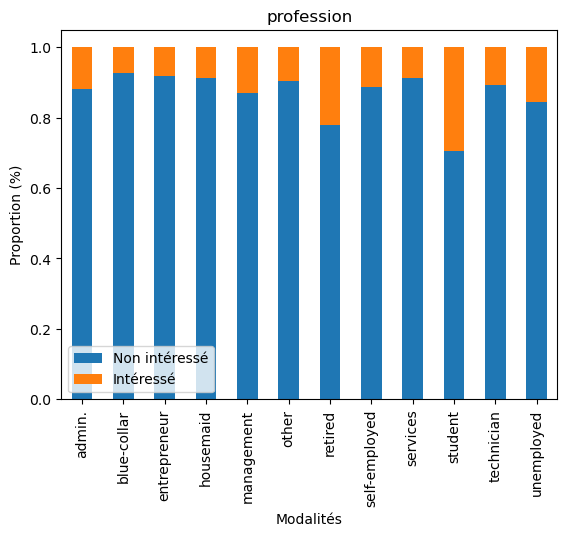

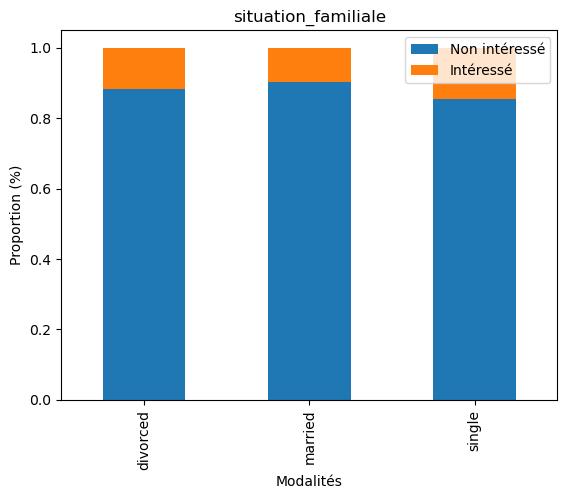

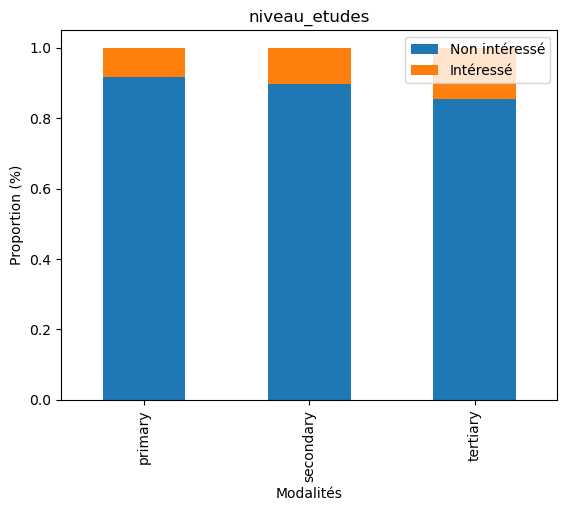

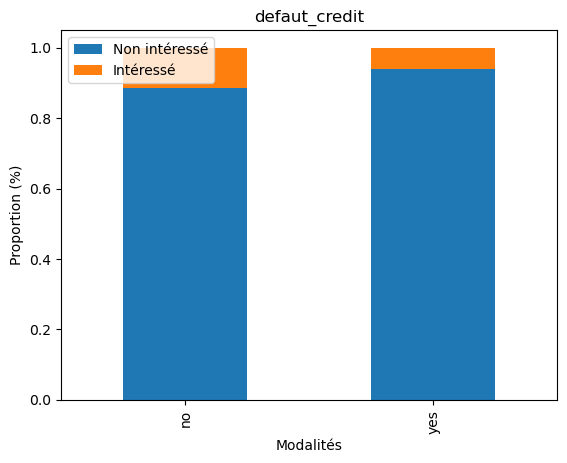

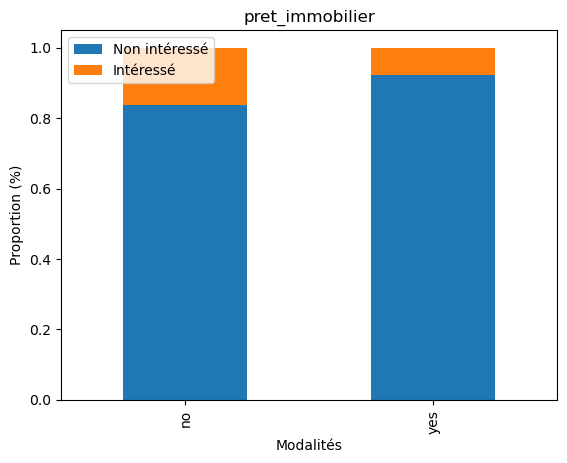

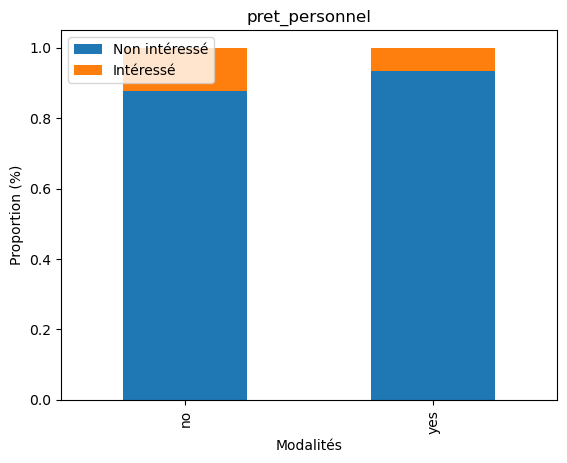

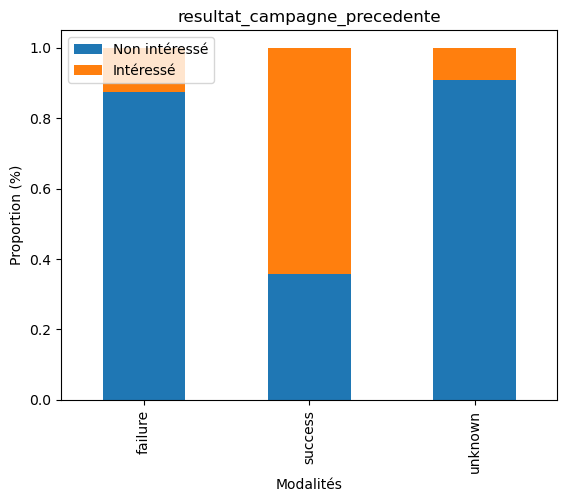

In [27]:
import seaborn as sns
# selection des variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel', 'resultat_campagne_precedente']

# Generer un count plot pour chaque variable categorielle
# definr la taille des figures

# Generer un bar plot pour chaque variable categorielle
for var in cat_vars:
    (bankdata.groupby([var, 'reponse_campagne_actuelle_binaire'])['reponse_campagne_actuelle_binaire'].count()/bankdata.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Non intéressé', 'Intéressé'])
    plt.show()
    

In [29]:
# On va mesurer l'intensité de la relation entre differentes variables 
from scipy.stats import chi2_contingency
# Selectionner les variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel', 'resultat_campagne_precedente']

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = [] 
cramer_vs = []

# Parcourir toutes les variables categorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(bankdata['reponse_campagne_actuelle_binaire'], bankdata[var])
    # Calculer la statistique de test di chi_deux et la p_valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k= contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1, kc-1))
    # Ajouter les resultats aux listes correspondates
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Creer un DataFrame avec les resultats
resultats_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2' : chi2_stats,
    'p-valeur' : p_values,
    'V de cramer' : cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
resultats_df.sort_values(by='V de cramer', inplace=True,ascending=False)

# Afficher le Tableau des résultats
print(resultats_df)

                       Variable         Chi2       p-valeur  V de cramer
6  resultat_campagne_precedente  4072.108164   0.000000e+00     0.315689
4               pret_immobilier   720.301364  1.151140e-158     0.132713
0                    profession   708.668621  7.474840e-145     0.130702
2                 niveau_etudes   210.723005   1.746147e-46     0.071489
1           situation_familiale   181.858771   3.234965e-40     0.066363
5                pret_personnel   176.976953   2.215667e-40     0.065642
3                 defaut_credit    21.401052   3.725668e-06     0.022350


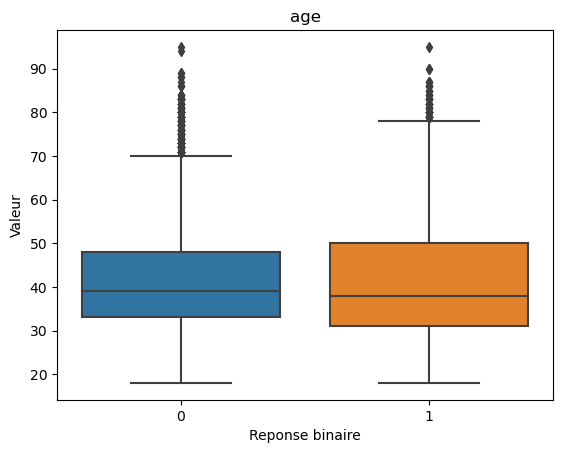

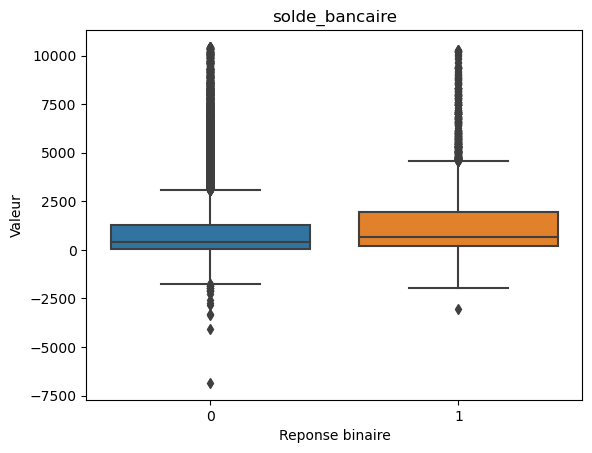

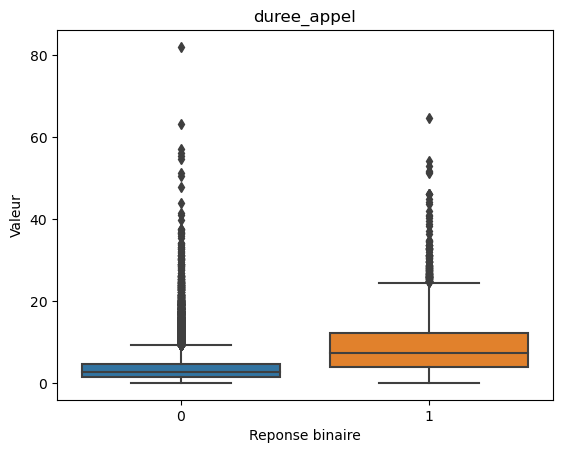

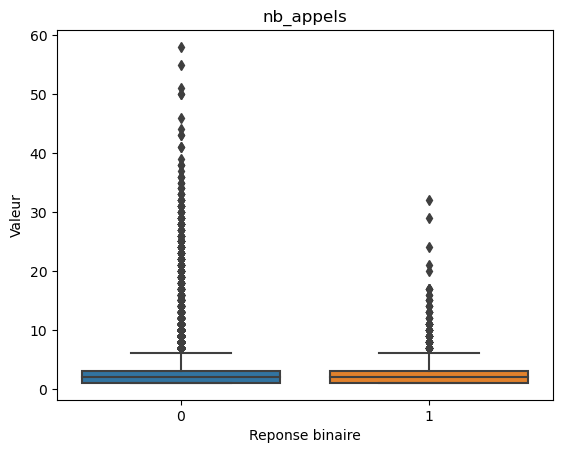

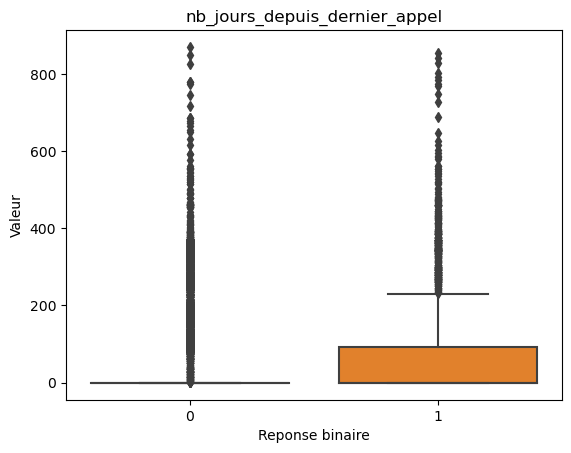

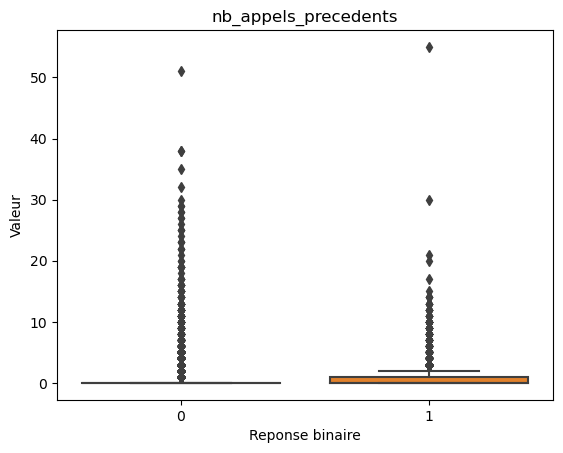

In [31]:
# Selectionner les variables numériques

# Selectionner les variables numériques
num_vars = ['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']

# Generer un box plot pour chaque variable numérique
for var in num_vars:
    sns.boxplot(x='reponse_campagne_actuelle_binaire', y=var, data=bankdata)
    plt.title(var)
    plt.xlabel('Reponse binaire')
    plt.ylabel('Valeur')
    plt.show()

In [33]:
import scipy.stats as stats
# Initialiser les listes pour stocker les resultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in num_vars:
    # Calculer les groupes de valeurs
    groups = [bankdata[bankdata['reponse_campagne_actuelle_binaire'] == 0][var], bankdata[bankdata['reponse_campagne_actuelle_binaire'] == 1][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les resultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Creer un DataFrame avecles resultats
resultats_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-wallis': kw_stat,
    'p_valeur': p_values
})

# Trier le DataFrame par orde croissant de p-valeur
resultats_df.sort_values(by='p_valeur', inplace=True)

# Afficher le tableau des resultats
print(resultats_df)

                        Variable  Kruskal-wallis       p_valeur
2                    duree_appel      1241.50463   0.000000e+00
5           nb_appels_precedents      1241.50463  5.825212e-272
4  nb_jours_depuis_dernier_appel      1241.50463  1.414875e-232
1                 solde_bancaire      1241.50463   6.874073e-82
3                      nb_appels      1241.50463   3.135286e-65
0                            age      1241.50463   3.354567e-02


### Modelisation

In [56]:
import statsmodels.api as sm
# Selectionner les variables explicatives et la variable  d'intérert
x = bankdata[['age', 'profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'solde_bancaire', 
              'pret_immobilier', 'pret_personnel', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel',
              'nb_appels_precedents', 'resultat_campagne_precedente']]
y = bankdata['reponse_campagne_actuelle_binaire']

In [58]:
# Convertir les variables catégorielles en variables indicatrices (dummies)
x = pd.get_dummies(x, columns=['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier',
                               'pret_personnel',  'resultat_campagne_precedente'], drop_first=True)

In [60]:
# Ajouter une constante pour l'interception (necessaire pour le modele de regression)
x = sm.add_constant(x)


In [42]:
# Diviser les données en ensemble d'apprentissage et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
# On convertit uniquement les colonnes booléennes en int (ou float si tu préfères) car on consate qu'on des booléens dans x_train et x_test
x_train = x_train.copy()  # éviter de modifier l'original si besoin
x_train.loc[:, x_train.dtypes == bool] = x_train.loc[:, x_train.dtypes == bool].astype(int)

x_test = x_test.copy()  # éviter de modifier l'original si besoin
x_test.loc[:, x_test.dtypes == bool] = x_test.loc[:, x_test.dtypes == bool].astype(int)

In [46]:
# Si on a des variables de type objet ou bool, on les convertit en float
print(x_train.dtypes)

const                                   float64
age                                       int64
solde_bancaire                            int64
duree_appel                             float64
nb_appels                                 int64
nb_jours_depuis_dernier_appel             int64
nb_appels_precedents                      int64
profession_blue-collar                    int32
profession_entrepreneur                   int32
profession_housemaid                      int32
profession_management                     int32
profession_other                          int32
profession_retired                        int32
profession_self-employed                  int32
profession_services                       int32
profession_student                        int32
profession_technician                     int32
profession_unemployed                     int32
situation_familiale_married               int32
situation_familiale_single                int32
niveau_etudes_secondary                 

In [48]:
# Creer le modele de regression logistique
logit_model = sm.Logit(y_train, x_train)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculer le VIF pour chaque variable explicative (pour verifier qu'il n'y a pas de multicolinéarité)
# si le vif est superieur à 5 ou 10 (en fonction du seuil que l'on a choisi), on aura multicolinéarité
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

# Afficher les resultats
print(vif)

# Tout est inferieur à 10, on conclut qu'il n'y a pas multicolinéarité

    VIF Factor                              features
0   113.280676                                 const
1     1.649159                                   age
2     1.047648                        solde_bancaire
3     1.013305                           duree_appel
4     1.025593                             nb_appels
5     4.805838         nb_jours_depuis_dernier_appel
6     1.812787                  nb_appels_precedents
7     2.483125                profession_blue-collar
8     1.297411               profession_entrepreneur
9     1.289581                  profession_housemaid
10    3.023262                 profession_management
11    1.038067                      profession_other
12    1.691235                    profession_retired
13    1.322147              profession_self-employed
14    1.638126                   profession_services
15    1.190628                    profession_student
16    2.078461                 profession_technician
17    1.231003                 profession_unem

In [50]:
# Ajuster le modele aux données d'apprentissage
resultat = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.245375
         Iterations 8


In [52]:
# Afficher le résumé des résultats de la régression
print(resultat.summary())

                                   Logit Regression Results                                  
Dep. Variable:     reponse_campagne_actuelle_binaire   No. Observations:                32672
Model:                                         Logit   Df Residuals:                    32645
Method:                                          MLE   Df Model:                           26
Date:                               Mon, 21 Apr 2025   Pseudo R-squ.:                  0.2973
Time:                                       16:02:48   Log-Likelihood:                -8016.9
converged:                                      True   LL-Null:                       -11409.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 

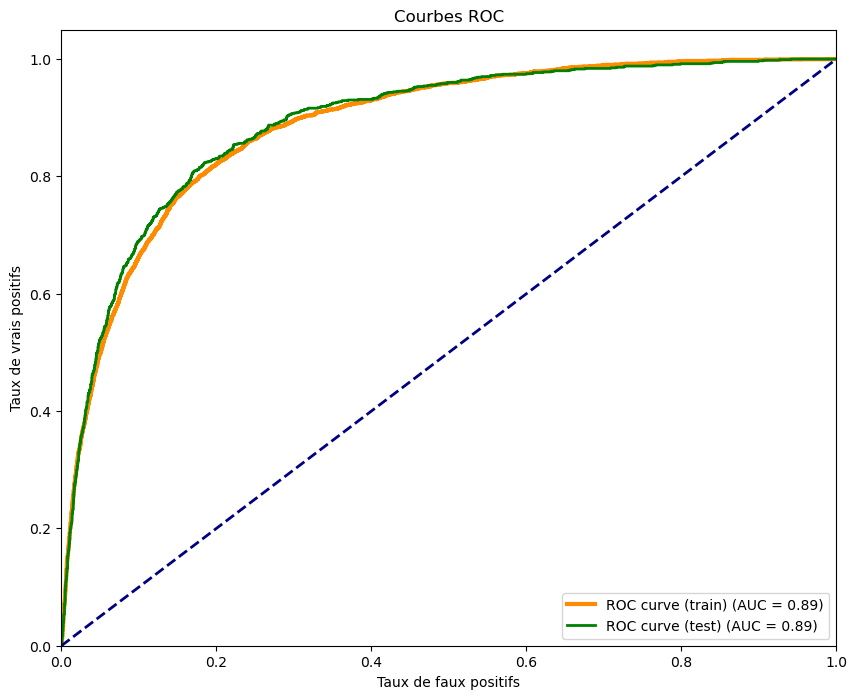

In [70]:
from sklearn.metrics import roc_curve, auc
# Obtenir les predictions du modele sur l'ensemble d'entrainement et de test
y_train_pred = resultat.predict(x_train)
y_test_pred = resultat.predict(x_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=3, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

**La bissectrice ou droite en pointillé represente le niveau ou le modele ne fait pas mieux que le hasard**

au vu de tout cela, le modele est pertinent d'un point de vue statistique (AUC)

On peut mettre en place les predictions

### 5.1 Choix du seuil optimal

#### 5.1.1 Approche basé sur la courbe ROC

Le choix du seuil optimal en machine learning est important pour la classification des données et peut etre déterminé en utilisant la courbe ROC (Receiver Operating Characteristic). La courbe ROC represente la performance du modele de classification pour differents seuils de classification **en tracant le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité)**

Le seuil optimal est choisi en **maximisant la somme de la sensibilité et de la spécificité**, ce qui correspond à **un point sur la courbe ROC le plus proche possible du coin supérieur gauche**. Ce point est souvent appelé point de fonctionnement optimal (OFP) et représente un compromis entre la sensibilité et la  spécificité du modele.

Rappel:
vrais positifs : tous les clients qui ont souscrit au dépot a terme , le modele predit egalement que les clients souscrivent au dépot à terme
Faux positifs : tous les clients qui n'ont pas souscrit au dépot a terme , le modele predit que les clients ont souscrit au dépot à terme

In [82]:
from sklearn.metrics import precision_score
# Calculer la prediction et la probabilité
y_pred_test = resultat.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
y_pred_test.describe()

count    8169.000000
mean        0.114085
std         0.178636
min         0.000152
25%         0.025428
50%         0.048115
75%         0.106073
max         0.999948
dtype: float64

In [77]:
# Trouver le point de fonctionnement optimal
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.10058662376810382

Si la probabilité est supérieur à 0.10, on peut dire que le client va souscrire au dépot à terme

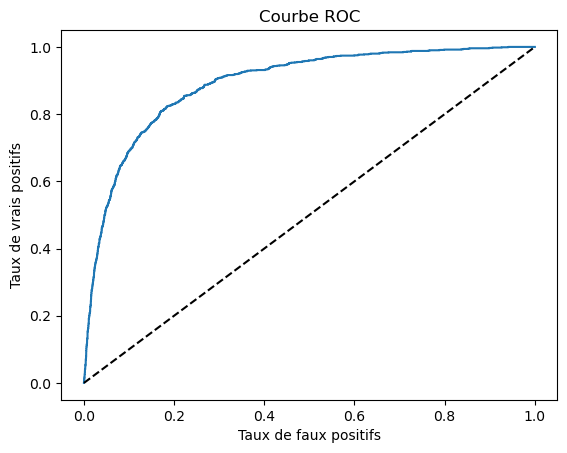

In [85]:
# Tracer la courbe ROC
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.show()

### 5.1.2 Approche la précision, le rappel et le F1-score

La methode de sélection du seuil à partir de la courbe de précision-rappel consiste à trouver **le seuil qui maximise l'équilibre entre la précision et le rappel** du modele de classification binaire. Cette méthode trace la courbe de précision-rappel en fonction des seuils de classification et identifie le seuil optimal en trouvant le point ou la precision et le rappel sont équilibrés.

**La précision mesure la proportion de vrais positifs parmi les prédictions positives, tandis que le rappel (recall) mesure la proportion de vrais positifs parmi les observations positives.**

In [90]:
from sklearn.metrics import precision_recall_curve

# Predire les probabilités des classes sur l'ensemble de test
y_pred_test = resultat.predict(x_test)

# Calculer la courbe de precision-rappel
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)

# Trouver le seuil optimal
optimal_idx = np.argmax(precision + recall)
optmal_threshold = thresholds[optimal_idx]
optmal_threshold

0.10058662376810382

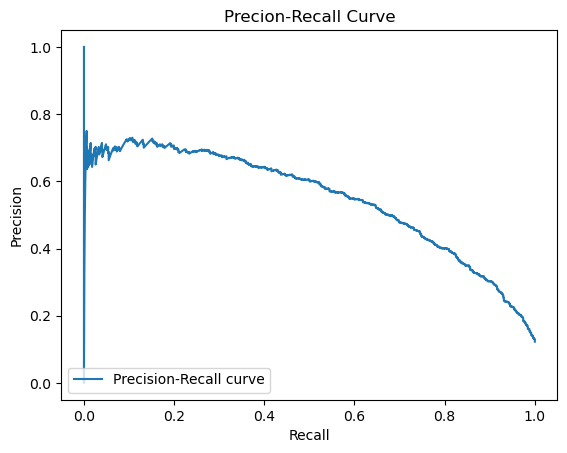

In [92]:
# Tracer la courbe de precision-rappel
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precion-Recall Curve')
plt.legend(loc="lower left")
plt.show()

les deux approches precedentes donne autant d'importance à la mauvaise prediction (à la classe 1 ou encore à la classe 0) or dans la pratique, le cout d'une mauvaise prediction de 1 ou de 0 n'est pas toujours le meme

Exemple : le risque de predire que quelqu'un ne va pas faire defaut est plus important que de predire que quelqu'un va faire defaut

C'est donc important de mettre en place un modele qui va donner un cout different à la mauvaise prediction ( à 1 ou à 0) -- > methode suivante

#### 5.1.3 La méthode de la classification cout-sensible


In [97]:
def calculate_cost(y_true, y_pred, fp_cost, fn_cost, vp_cost, vn_cost):
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    vp = ((y_true == 1) & (y_pred == 1)).sum()
    vn = ((y_true == 0) & (y_pred == 0)).sum()
    cost = fp * fp_cost + fn * fn_cost + vp * vp_cost + vn * vn_cost
    return cost

In [99]:
thresholds = np.arange(0, 1, 0.01)
fp_cost = 10 # Cout de faux positifs
fn_cost = 100 # Cout des faux negatifs
vp_cost = 0 # Cout des vrais positifs
vn_cost = 0 # Cout des vrais n"gatifs
costs = []
for threshold in thresholds:
    y_pred = (y_pred_test > threshold).astype(int)
    cost = calculate_cost(y_test, y_pred, fp_cost, fn_cost, vp_cost, vn_cost)
    costs.append(cost)

In [101]:
optimal_threshold = thresholds[np.argmin(costs)]
optimal_threshold

0.1

### 5.1.4 Choix du seuil optimal en utilisant la méthode de Youden

La methode de Youden est une methode de selection de seuil dans un modele de classification binaire basé sur deux densités( ou deux distributions de probabilité). Elle consiste à trouver les seuil qui maximise la somme de la sensibilité et de la spécificité moins un, c'est-à-dire la quantité suivante : **sensibilité + spécificité - 1.**

La sensibilité est la proportion de vrais positifs parmi tous les cas positifs, et la spécificité est la proportion de vrais négatifs parmi tous les cas négatifs.

En maximisant cette quantité, la méthode de Youden permet de trouver le seuil qui maximise la performance globale du modele.

**On trace la densité de proba deseux courbes et au croisement, on aura le seuil**

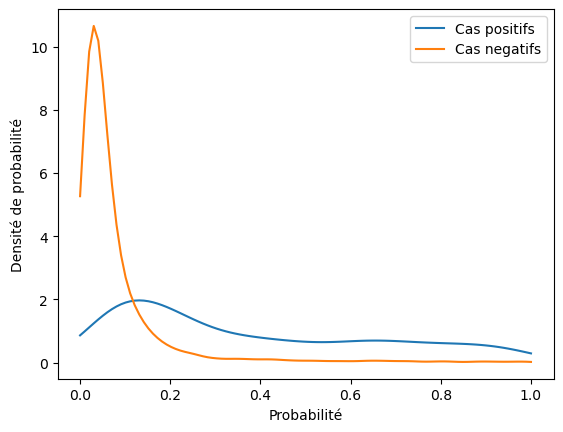

In [110]:
import numpy as np 
from scipy import  stats

# Calculer la densité de probabilité pour les cas positifs et négatifs
density_pos = stats.gaussian_kde(y_pred_test[y_test == 1])
density_neg = stats.gaussian_kde(y_pred_test[y_test == 0])

# Definir une plage de valeurs pour le tracé
x = np.linspace(0, 1, 100)

# Tracer les deux deinsités de probabilité
fig, ax = plt.subplots()
ax.plot(x, density_pos(x), label='Cas positifs')
ax.plot(x, density_neg(x), label='Cas negatifs')
ax.legend()
ax.set_xlabel('Probabilité')
ax.set_ylabel('Densité de probabilité')
plt.show()

On doit avoir des courbes assez differentes. ( une partie des densités est similaire apres le croisemnent ce qui n'est pas idéal)
Plus le modele est performant, plus les deux densités seront differentes

In [115]:
# Definir une plage de valeurs de seuil
thresholds = np.linspace(0, 1, 100)

# Initialiser les variables pour stocker les resultats optimaux
optimal_threshold = 0
max_youden = -1

# Parcourir toutes les valeurs de seuil et trouver celui qui maximise la somme de sensibilité et de spécificité
for threshold in thresholds:
    sensibility = density_pos.integrate_box_1d(threshold, 1)
    specificity = 1 - density_neg.integrate_box_1d(threshold, 1)
    youden = sensibility + specificity - 1
    if youden > max_youden:
        max_youden = youden
        optimal_threshold = threshold

print("Le seuil optimal est : {: .2f}".format(optimal_threshold))

Le seuil optimal est :  0.12


In [ ]:
Le seuil optimal avec la methode Youden est de 0.12